<a href="https://colab.research.google.com/github/KarthikeyanBaskaran/FinancialAnalytics/blob/main/Financial_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib yfinance --quiet

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Download Meta stock price data for 2024
meta = yf.download("META", start="2024-01-01", end="2024-12-31")

# Calculate 20-day Simple Moving Average and Standard Deviation
window = 20
meta['SMA20'] = meta['Close'].rolling(window=window).mean()
meta['STD20'] = meta['Close'].rolling(window=window).std()

# Calculate Bollinger Bands
meta['UpperBand'] = meta['SMA20'] + 2 * meta['STD20']
meta['LowerBand'] = meta['SMA20'] - 2 * meta['STD20']

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


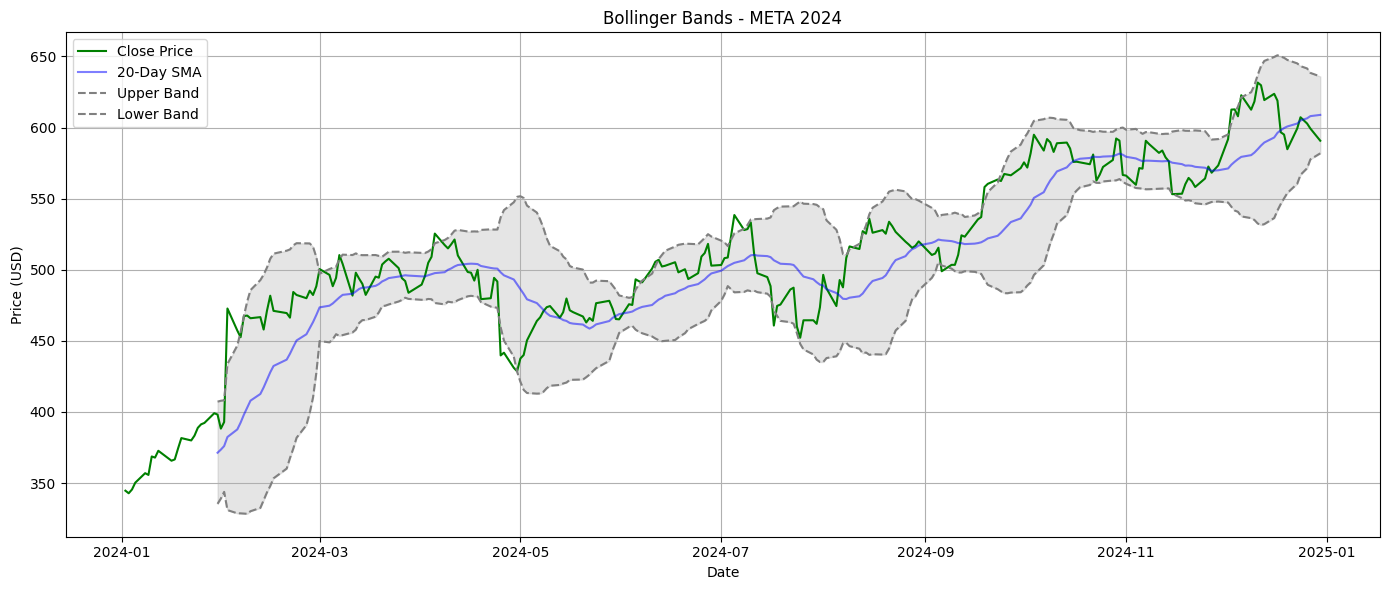

In [2]:
# Plot the Bollinger Bands
plt.figure(figsize=(14, 6))
plt.plot(meta['Close'], label='Close Price', color='green')
plt.plot(meta['SMA20'], label='20-Day SMA', color='blue',alpha=0.5)
plt.plot(meta['UpperBand'], label='Upper Band', color='grey', linestyle='--')
plt.plot(meta['LowerBand'], label='Lower Band', color='grey', linestyle='--')
plt.fill_between(meta.index, meta['UpperBand'], meta['LowerBand'], color='gray', alpha=0.2)
plt.title('Bollinger Bands - META 2024')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Monte Carlo

[*********************100%***********************]  1 of 1 completed
C:\Users\karth\AppData\Local\Temp\ipykernel_29764\1697371595.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  mu = float(log_returns.mean())           # Daily return
C:\Users\karth\AppData\Local\Temp\ipykernel_29764\1697371595.py:15: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  sigma = float(log_returns.std())         # Daily volatility
C:\Users\karth\AppData\Local\Temp\ipykernel_29764\1697371595.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  S0 = float(close_prices.iloc[-1])        # Last close price of 2024


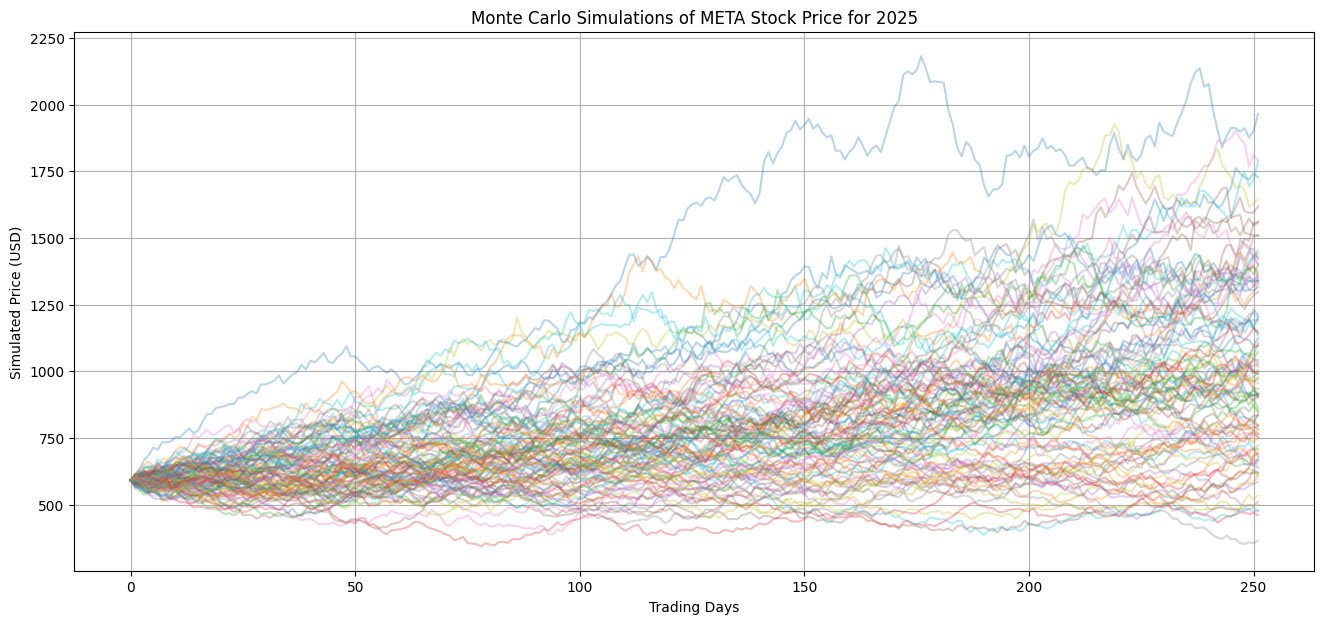

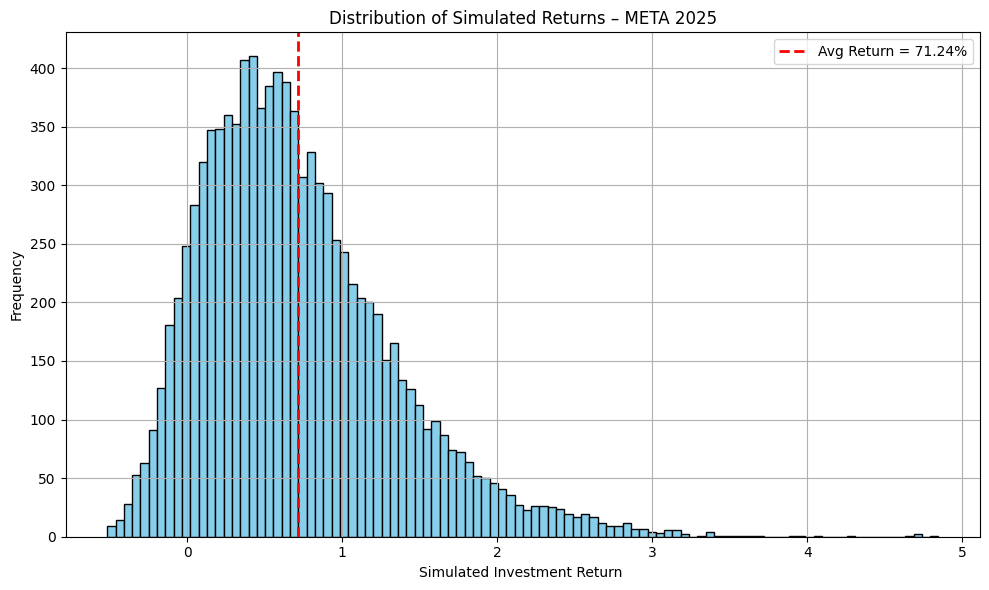

📊 95% Confidence Interval for Price on Dec 31, 2025: $472.93 to $1919.17
📈 Average Potential Return: 71.24%
📉 Standard Deviation of Return: 62.60%


In [ ]:

# STEP 2: Download META 2024 data
meta = yf.download("META", start="2024-01-01", end="2024-12-31")
close_prices = meta['Close'].dropna()

# STEP 3: Calculate log returns
log_returns = np.log(close_prices / close_prices.shift(1)).dropna()

# STEP 4: Extract parameters as floats
mu = float(log_returns.mean())           # Daily return
sigma = float(log_returns.std())         # Daily volatility
S0 = float(close_prices.iloc[-1])        # Last close price of 2024

# STEP 5: Monte Carlo Simulation
days = 252
simulations = 10000

np.random.seed(42)
simulated_prices = np.zeros((days, simulations))
simulated_prices[0] = S0

for t in range(1, days):
    z = np.random.standard_normal(simulations)  # Random draws
    drift = mu - 0.5 * sigma**2
    shock = sigma * z
    simulated_prices[t] = simulated_prices[t - 1] * np.exp(drift + shock)

# STEP 6: Plot simulated paths (first 100)
plt.figure(figsize=(16, 7))
plt.plot(simulated_prices[:, :100], alpha=0.3)
plt.title("Monte Carlo Simulations of META Stock Price for 2025")
plt.xlabel("Trading Days")
plt.ylabel("Simulated Price (USD)")
plt.grid(True)
plt.show()

# STEP 7: Histogram of final returns
final_prices = simulated_prices[-1]
returns = (final_prices - S0) / S0

plt.figure(figsize=(10, 6))
plt.hist(returns, bins=100, color='skyblue', edgecolor='black')
plt.axvline(returns.mean(), color='red', linestyle='--', linewidth=2, label=f'Avg Return = {returns.mean():.2%}')
plt.title("Distribution of Simulated Returns – META 2025")
plt.xlabel("Simulated Investment Return ")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# STEP 8: Confidence interval and statistics
lower_bound = np.percentile(final_prices, 2.5)
upper_bound = np.percentile(final_prices, 97.5)
avg_return = returns.mean()
std_return = returns.std()

print(f"📊 95% Confidence Interval for Price on Dec 31, 2025: ${lower_bound:.2f} to ${upper_bound:.2f}")
print(f"📈 Average Potential Return: {avg_return:.2%}")
print(f"📉 Standard Deviation of Return: {std_return:.2%}")


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import yfinance as yfs


In [2]:

symbol = 'META'

orginal = yfs.download(symbol, period="max", interval="1d")
orginal.to_csv("META.csv")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
orginal = pd.read_csv("META.csv")
orginal = orginal[2:]
orginal = orginal.reset_index()
orginal = orginal.drop(columns=["index"])
orginal = orginal.rename(columns={"Price":"Date"})
columns_to_convert = ["Close", "High", "Low", "Open"]
orginal[columns_to_convert] = orginal[columns_to_convert].astype(float)
orginal['Date'] = pd.to_datetime(orginal['Date'])
orginal['Volume'] = orginal['Volume'].astype(int)
orginal.head()

,Date,Close,High,Low,Open,Volume
0,2012-05-18,38.050671,44.788914,37.821750,41.852752,573576400
1,2012-05-21,33.870373,36.488037,32.845205,36.358646,168192700
2,2012-05-22,30.854584,33.432435,30.794866,32.457032,101786600
3,2012-05-23,31.849892,32.347546,31.212894,31.222848,73600000
4,2012-05-24,32.875057,33.054213,31.620969,32.795434,50237200


In [4]:
orginal.head(), orginal.tail()

(        Date      Close       High        Low       Open     Volume
 0 2012-05-18  38.050671  44.788914  37.821750  41.852752  573576400
 1 2012-05-21  33.870373  36.488037  32.845205  36.358646  168192700
 2 2012-05-22  30.854584  33.432435  30.794866  32.457032  101786600
 3 2012-05-23  31.849892  32.347546  31.212894  31.222848   73600000
 4 2012-05-24  32.875057  33.054213  31.620969  32.795434   50237200,
            Date       Close        High         Low        Open    Volume
 3243 2025-04-11  543.570007  547.400024  528.590027  535.510010  17642300
 3244 2025-04-14  531.479980  557.770020  528.280029  556.169983  14130900
 3245 2025-04-15  521.520020  537.940002  517.500000  532.109985  15558700
 3246 2025-04-16  502.309998  513.369995  495.630005  508.510010  18735100
 3247 2025-04-17  501.480011  507.299988  498.010010  505.250000  14593500)

In [5]:
df = orginal[(orginal['Date']>=datetime.datetime(2024,1,1))& (orginal['Date']<=datetime.datetime(2024,12,31))].reset_index().drop(columns=["index"])
test = orginal[orginal['Date']>datetime.datetime(2024,12,31)].reset_index().drop(columns=["index"])
df.tail(), test.head()

(          Date       Close        High         Low        Open   Volume
 247 2024-12-24  607.209778  607.449555  598.747336  602.184220  4726100
 248 2024-12-26  602.813660  605.761050  598.407607  604.941771  6081400
 249 2024-12-27  599.276855  601.315020  589.275743  598.877187  8084200
 250 2024-12-30  590.714417  596.409362  585.059475  588.226640  7025900
 251 2024-12-31  584.989563  593.442004  583.331004  591.743564  6019500,
         Date       Close        High         Low        Open    Volume
 0 2025-01-02  598.707336  604.372279  587.297505  589.195779  12682300
 1 2025-01-03  604.092529  608.958195  595.879805  604.222419  11436800
 2 2025-01-06  629.639832  630.429107  605.081663  611.286165  14560800
 3 2025-01-07  617.340759  631.538089  607.689312  631.138481  12071500
 4 2025-01-08  610.177124  615.892071  602.254180  612.854796  10085800)

# 5. Stock Signals

In [6]:
#Simple moving average

df["SMA10"] = df["Close"].rolling(window=10).mean()
df["SMA30"] = df["Close"].rolling(window=30).mean()
# Identify Buy and Sell signals
df["Buy_Signal_SMA"] = (df["SMA10"] > df["SMA30"]) & (df["SMA10"].shift(1) <= df["SMA30"].shift(1))
df["Sell_Signal_SMA"] = (df["SMA10"] < df["SMA30"]) & (df["SMA10"].shift(1) >= df["SMA30"].shift(1))

In [7]:
df.head()

,Date,Close,High,Low,Open,Volume,SMA10,SMA30,Buy_Signal_SMA,Sell_Signal_SMA
0,2024-01-02,344.665588,351.503357,338.415049,349.671992,19042200,NaN,NaN,False,False
1,2024-01-03,342.854126,346.317813,341.570169,343.361743,15451100,NaN,NaN,False,False
2,2024-01-04,345.491699,346.516866,341.789148,342.883994,12099900,NaN,NaN,False,False
3,2024-01-05,350.299042,351.841759,344.635731,345.362287,13920700,NaN,NaN,False,False
4,2024-01-08,356.977600,357.296106,350.398591,353.036184,13890200,NaN,NaN,False,False


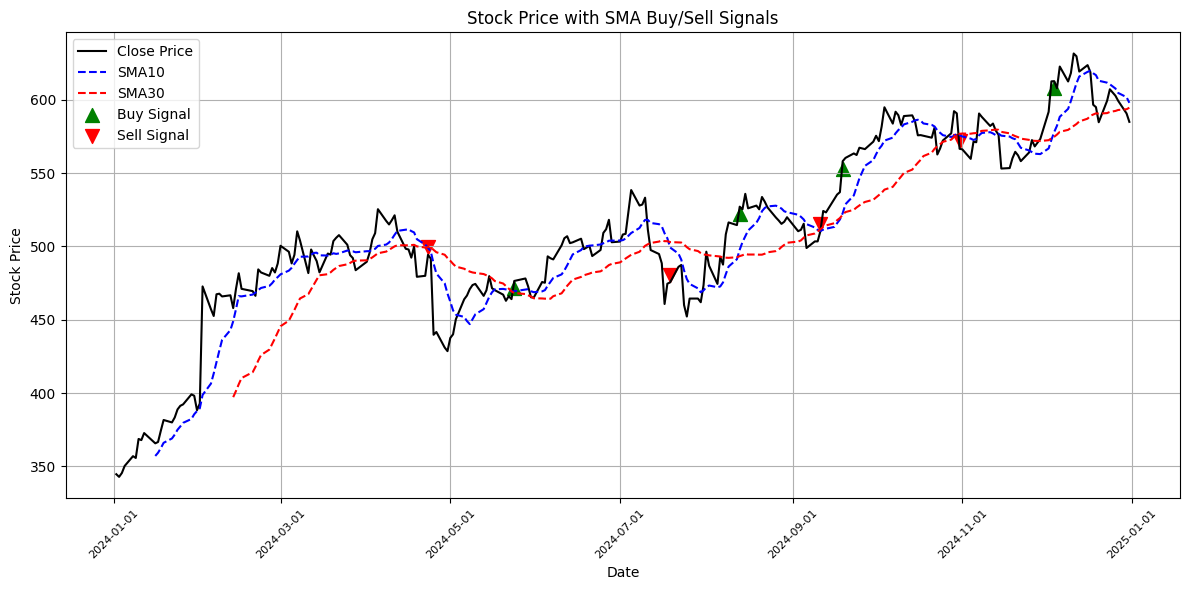

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Define an offset for the arrows
offset = 5  # Adjust this value as needed

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], color='black', label='Close Price')
plt.plot(df['Date'], df['SMA10'], color='blue', linestyle='--', label='SMA10')
plt.plot(df['Date'], df['SMA30'], color='red', linestyle='--', label='SMA30')

# Plot Buy Signals with offset
buy_signals = df[df['Buy_Signal_SMA']]
plt.scatter(buy_signals['Date'], buy_signals['Close'] - offset, marker='^', s=100, color='green', label='Buy Signal')

# Plot Sell Signals with offset
sell_signals = df[df['Sell_Signal_SMA']]
plt.scatter(sell_signals['Date'], sell_signals['Close'] + offset, marker='v', s=100, color='red', label='Sell Signal')

# Format the x-axis to show dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_tick_params(rotation=45, labelsize=8)
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price with SMA Buy/Sell Signals')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
#Exponential moving average
# Exponential moving average
df["EMA10"] = df["Close"].ewm(span=10, adjust=False, min_periods=10).mean()
df["EMA30"] = df["Close"].ewm(span=30, adjust=False, min_periods=50).mean()
df["Buy_Signal_EMA"] = (df["EMA10"] > df["EMA30"]) & (df["EMA10"].shift(1) <= df["EMA30"].shift(1))
df["Sell_Signal_EMA"] = (df["EMA10"] < df["EMA30"]) & (df["EMA10"].shift(1) >= df["EMA30"].shift(1))


In [10]:
df.head()

,Date,Close,High,Low,Open,Volume,SMA10,SMA30,Buy_Signal_SMA,Sell_Signal_SMA,EMA10,EMA30,Buy_Signal_EMA,Sell_Signal_EMA
0,2024-01-02,344.665588,351.503357,338.415049,349.671992,19042200,NaN,NaN,False,False,NaN,NaN,False,False
1,2024-01-03,342.854126,346.317813,341.570169,343.361743,15451100,NaN,NaN,False,False,NaN,NaN,False,False
2,2024-01-04,345.491699,346.516866,341.789148,342.883994,12099900,NaN,NaN,False,False,NaN,NaN,False,False
3,2024-01-05,350.299042,351.841759,344.635731,345.362287,13920700,NaN,NaN,False,False,NaN,NaN,False,False
4,2024-01-08,356.977600,357.296106,350.398591,353.036184,13890200,NaN,NaN,False,False,NaN,NaN,False,False


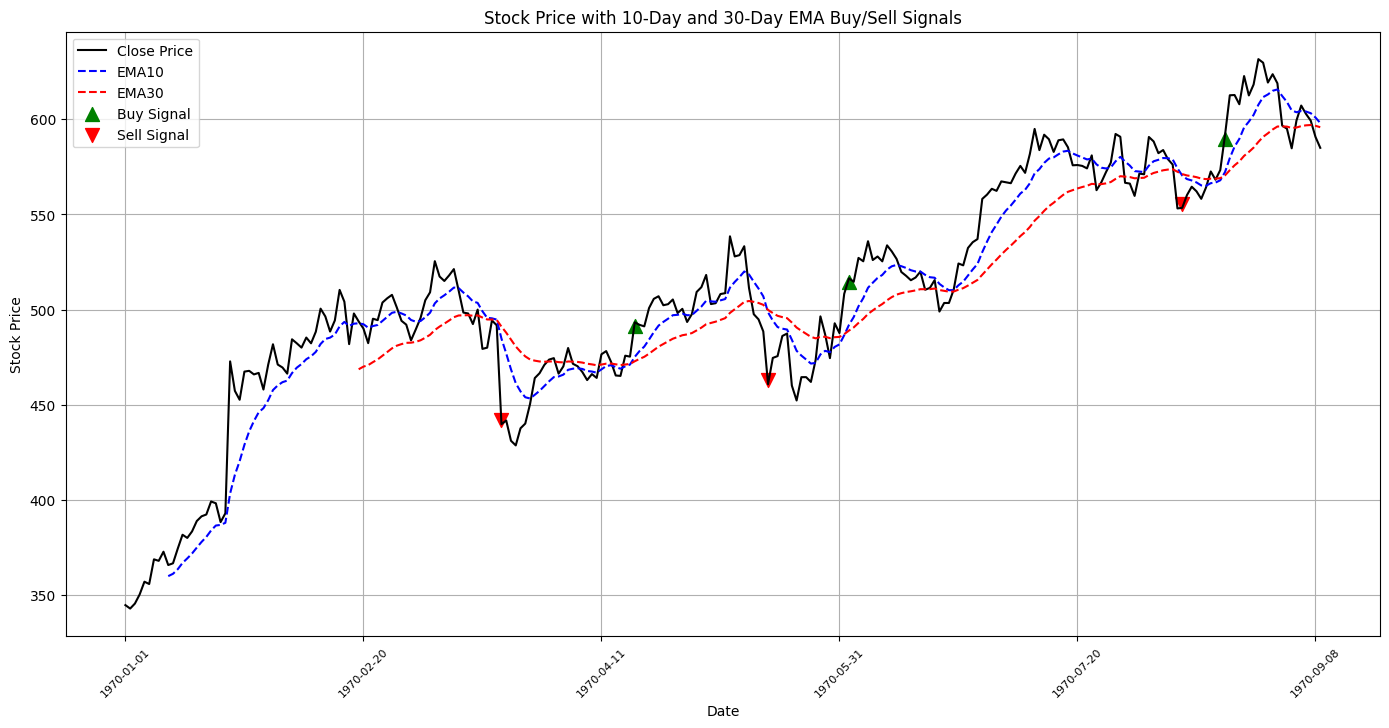

In [11]:
# Define an offset for the arrows
offset = 2  # Adjust this value as needed
arrow_size = 100  # Adjust this value for arrow size

# Plot
plt.figure(figsize=(14, 7))
plt.plot(df["Close"], label="Close Price", color="black")
plt.plot(df["EMA10"], label="EMA10", color="blue", linestyle="dashed")
plt.plot(df["EMA30"], label="EMA30", color="red", linestyle="dashed")

# Plot Buy Signals with offset and adjusted size
buy_signals = df[df["Buy_Signal_EMA"]]
plt.scatter(buy_signals.index, buy_signals["Close"] - offset, marker="^", s=arrow_size, color="green", label="Buy Signal", alpha=1)

# Plot Sell Signals with offset and adjusted size
sell_signals = df[df["Sell_Signal_EMA"]]
plt.scatter(sell_signals.index, sell_signals["Close"] + offset, marker="v", s=arrow_size, color="red", label="Sell Signal", alpha=1)

plt.title("Stock Price with 10-Day and 30-Day EMA Buy/Sell Signals")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Format the x-axis to display dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_tick_params(rotation=45, labelsize=8)

plt.show()

# 6. Forecasting

In [12]:
!pip install prophet optuna --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 16.3 MB/s eta 0:00:00


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import optuna
import matplotlib.pyplot as plt

# Prophet
from prophet import Prophet

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

##


In [14]:
df.tail()

,Date,Close,High,Low,Open,Volume,SMA10,SMA30,Buy_Signal_SMA,Sell_Signal_SMA,EMA10,EMA30,Buy_Signal_EMA,Sell_Signal_EMA
247,2024-12-24,607.209778,607.449555,598.747336,602.184220,4726100,610.615906,591.790440,False,False,604.335789,596.405806,False,False
248,2024-12-26,602.813660,605.761050,598.407607,604.941771,6081400,607.736462,592.423254,False,False,604.059039,596.819216,False,False
249,2024-12-27,599.276855,601.315020,589.275743,598.877187,8084200,604.692017,593.098570,False,False,603.189551,596.977773,False,False
250,2024-12-30,590.714417,596.409362,585.059475,588.226640,7025900,601.833557,593.582977,False,False,600.921345,596.573686,False,False
251,2024-12-31,584.989563,593.442004,583.331004,591.743564,6019500,597.964001,594.644586,False,False,598.024657,595.826323,False,False


In [15]:
train_df = df[["Date","Close", 'Volume']]
train_df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

<ipython-input-15-9067046c37a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)


In [16]:
train_df.tail()

,ds,y,Volume
247,2024-12-24,607.209778,4726100
248,2024-12-26,602.813660,6081400
249,2024-12-27,599.276855,8084200
250,2024-12-30,590.714417,7025900
251,2024-12-31,584.989563,6019500


In [17]:
actual = orginal[orginal['Date']>=datetime.datetime(2024,12,31)].reset_index().drop(columns=["index"])

In [18]:
test_df = actual[['Date', 'Close', 'Volume']]
test_df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

<ipython-input-18-abe0d53c666a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)


In [19]:
len(train_df), len(test_df)

(252, 74)

In [20]:
def create_lagged_features(df, lags):
    df = df.sort_values('ds').copy()

    for lag in lags:
        df[f'Close_Lag{lag}'] = df['y'].shift(lag)

    # Drop rows with NaNs introduced by shifting
    df.dropna(inplace=True)
    return df


In [21]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from prophet.plot import add_changepoints_to_plot
import optuna
from prophet.diagnostics import cross_validation, performance_metrics
import datetime
import numpy as np

# Assuming you have train_df and test_df loaded as in your original notebook
# Make sure 'ds' column is in datetime format

# --- Define your objective function for Optuna (if you haven't run it already) ---
def objective(trial):
    # Hyperparameters to tune
    seasonality_mode = trial.suggest_categorical("seasonality_mode", ["additive", "multiplicative"])
    changepoint_prior_scale = trial.suggest_float("changepoint_prior_scale", 0.01, 20.0, log=True)
    seasonality_prior_scale = trial.suggest_float("seasonality_prior_scale", 0.01, 20.0, log=True)
    holidays_prior_scale = trial.suggest_float("holidays_prior_scale", 0.01, 10.0, log=True)

    # Build the Prophet model
    model = Prophet(
        seasonality_mode=seasonality_mode,
        changepoint_prior_scale=changepoint_prior_scale,
        seasonality_prior_scale=seasonality_prior_scale,
        holidays_prior_scale=holidays_prior_scale,
    )

    # Add extra regressors
    model.add_regressor('Volume')

    # Fit on the train_df
    model.fit(train_df)

    df_cv = cross_validation(
        model=model,
        initial='180 days',   # e.g., use ~2 years of data before first cutoff
        horizon='30 days',     # e.g., 3-month forecast horizon
        period='90 days'      # new fold every 3 months
    )

    # Predict on val_sub
    df_metrics = performance_metrics(df_cv, rolling_window=1)
    rmse_cv = df_metrics['rmse'].values[0]   # We'll optimize for RMSE

    return rmse_cv

# --- Run Optuna study (if you haven't already) ---
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=40)  # Increase n_trials for more thorough search
best_trial = study.best_trial
print("Best trial RMSE (Val):", best_trial.value)
print("Best trial params:", best_trial.params)

best_params = study.best_params

# --- Modify Prophet to only predict on business days ---

def business_day_filter(dates):
    """Filters out non-business days (weekends) from a list of dates."""
    return [date for date in dates if date.weekday() < 5]

final_model = Prophet(
    seasonality_mode=best_params["seasonality_mode"],
    changepoint_prior_scale=best_params["changepoint_prior_scale"],
    seasonality_prior_scale=best_params["seasonality_prior_scale"],
    holidays_prior_scale=best_params["holidays_prior_scale"]
)

lags_to_include = [1, 5, 10, 20] # Example lags
train_df_lagged = create_lagged_features(train_df.copy(), lags_to_include)
test_df_lagged = create_lagged_features(test_df.copy(), lags_to_include)

# Add the lagged features as regressors to the Prophet model
for lag in lags_to_include:
    final_model.add_regressor(f'Close_Lag{lag}')
final_model.add_regressor('Volume') # Ensure 'Volume' is added

final_model.fit(train_df_lagged)

# Create future dataframe with all dates in the test period
future_all = final_model.make_future_dataframe(periods=len(test_df), freq='D')

# Filter for business days
future_business_days = future_all[future_all['ds'].dt.weekday < 5]

# Merge with the 'Volume' data for the test period
future_test_with_volume = pd.merge(future_business_days, test_df[['ds', 'Volume']], on='ds', how='inner')

# Ensure the order of columns matches what the model was trained on
future_test_lagged = future_test_with_volume[['ds', 'Volume']].copy()
for lag in lags_to_include:
    future_test_lagged[f'Close_Lag{lag}'] = np.nan # Initialize with NaN

# Manually create lagged features for the future (this is a bit tricky as we don't have actual future 'y' values)
# A more accurate approach might involve iteratively predicting and using the predicted values for subsequent lags,
# but for a direct prediction on the test set, we'll use the lagged values from the end of the training data.

last_train_data = train_df_lagged.tail(lags_to_include[-1])
last_train_data_y = last_train_data[['y']].values[::-1]
num_rows_to_fill = len(last_train_data_y)
lag_columns = [f'Close_Lag{lag}' for lag in lags_to_include]

for i in range(num_rows_to_fill):
    for j, lag in enumerate(lags_to_include):
        if i < len(future_test_lagged):
            future_test_lagged.loc[i, f'Close_Lag{lag}'] = last_train_data_y[i, 0]

for i in range(lags_to_include[-1], len(future_test_lagged)):
    for lag_val in lags_to_include:
        if i - lag_val >= 0 and i - lag_val < len(test_df_lagged):
            future_test_lagged.loc[i, f'Close_Lag{lag_val}'] = test_df_lagged.iloc[i - lag_val]['y']
        else:
            future_test_lagged.loc[i, f'Close_Lag{lag_val}'] = np.nan # Handle cases where lag exceeds available data
future_test_lagged.dropna(inplace=True)



[I 2025-04-18 19:49:28,947] A new study created in memory with name: no-name-288219f5-f50f-4dd0-bb97-eb0996d27ac7
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/1c0wv0z6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/3l12w_04.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21281', 'data', 'file=/tmp/tmpvl3x56bs/1c0wv0z6.json', 'init=/tmp/tmpvl3x56bs/3l12w_04.json', 'output', 'file=/tmp/tmpvl3x56bs/prophet_modelvxgibxhx/prophet_model-20250418194930.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:31 - cmdstanpy - 

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/3gzhene9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/jpc_syye.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81057', 'data', 'file=/tmp/tmpvl3x56bs/3gzhene9.json', 'init=/tmp/tmpvl3x56bs/jpc_syye.json', 'output', 'file=/tmp/tmpvl3x56bs/prophet_model91bz38mn/prophet_model-20250418194931.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/xo34djn6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/fejfj6dh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/9jan5g0g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/p73l01u8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50332', 'data', 'file=/tmp/tmpvl3x56bs/9jan5g0g.json', 'init=/tmp/tmpvl3x56bs/p73l01u8.json', 'output', 'file=/tmp/tmpvl3x56bs/prophet_model9udj4nbb/prophet_model-20250418194934.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/1b1mydmz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/f_ie0uic.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/lyqw0rgq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/60bkj8ax.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85568', 'data', 'file=/tmp/tmpvl3x56bs/lyqw0rgq.json', 'init=/tmp/tmpvl3x56bs/60bkj8ax.json', 'output', 'file=/tmp/tmpvl3x56bs/prophet_model1lku5guf/prophet_model-20250418194936.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/74wfi9kc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/sryu16gn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/cew6zvkt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/xdqcccte.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58078', 'data', 'file=/tmp/tmpvl3x56bs/cew6zvkt.json', 'init=/tmp/tmpvl3x56bs/xdqcccte.json', 'output', 'file=/tmp/tmpvl3x56bs/prophet_modeleqxn_4jy/prophet_model-20250418194937.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/tb1ywwnt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/x6v1hrvc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/t4sea69y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/9jlvwv14.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52388', 'data', 'file=/tmp/tmpvl3x56bs/t4sea69y.json', 'init=/tmp/tmpvl3x56bs/9jlvwv14.json', 'output', 'file=/tmp/tmpvl3x56bs/prophet_model6935_5kq/prophet_model-20250418194938.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/xj0hm869.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/c01u_t88.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/yyljn91_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/16qww4co.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89692', 'data', 'file=/tmp/tmpvl3x56bs/yyljn91_.json', 'init=/tmp/tmpvl3x56bs/16qww4co.json', 'output', 'file=/tmp/tmpvl3x56bs/prophet_model31vmhliu/prophet_model-20250418194939.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/0k4fw124.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/2pvya4mk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/bp1toq_m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/py8v3f3l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41125', 'data', 'file=/tmp/tmpvl3x56bs/bp1toq_m.json', 'init=/tmp/tmpvl3x56bs/py8v3f3l.json', 'output', 'file=/tmp/tmpvl3x56bs/prophet_modelqc0q8x2i/prophet_model-20250418194940.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/v8ibc4tk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/3hqrgke4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/q3m5vipp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/d4h_hs2f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48990', 'data', 'file=/tmp/tmpvl3x56bs/q3m5vipp.json', 'init=/tmp/tmpvl3x56bs/d4h_hs2f.json', 'output', 'file=/tmp/tmpvl3x56bs/prophet_model679np4wp/prophet_model-20250418194941.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/hiyt6oh3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/ial_i0q3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/764oiw3a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/gp63ivlh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70235', 'data', 'file=/tmp/tmpvl3x56bs/764oiw3a.json', 'init=/tmp/tmpvl3x56bs/gp63ivlh.json', 'output', 'file=/tmp/tmpvl3x56bs/prophet_modelr28y2f21/prophet_model-20250418194942.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/kadmqxmp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/ccdnyx0z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/snnofqmw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/8h2nwjp0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25568', 'data', 'file=/tmp/tmpvl3x56bs/snnofqmw.json', 'init=/tmp/tmpvl3x56bs/8h2nwjp0.json', 'output', 'file=/tmp/tmpvl3x56bs/prophet_modell6yglcxi/prophet_model-20250418194943.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/5_ezs_lp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/bsmij1ep.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/226rbmfv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/8c79199c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23170', 'data', 'file=/tmp/tmpvl3x56bs/226rbmfv.json', 'init=/tmp/tmpvl3x56bs/8c79199c.json', 'output', 'file=/tmp/tmpvl3x56bs/prophet_modeldezk43nm/prophet_model-20250418194944.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/twjk6mpb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/_l2mev8_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/ry41rd0q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/rfb9ij43.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48806', 'data', 'file=/tmp/tmpvl3x56bs/ry41rd0q.json', 'init=/tmp/tmpvl3x56bs/rfb9ij43.json', 'output', 'file=/tmp/tmpvl3x56bs/prophet_model4zbv1nww/prophet_model-20250418194945.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/8x_t8bj2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/cny6p44k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/f5d252ho.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/ikysamey.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44100', 'data', 'file=/tmp/tmpvl3x56bs/f5d252ho.json', 'init=/tmp/tmpvl3x56bs/ikysamey.json', 'output', 'file=/tmp/tmpvl3x56bs/prophet_modelxr73lwrs/prophet_model-20250418194946.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/4gm3ay67.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/1iu4h8nu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/tjmy5fyp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/ppsder71.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89057', 'data', 'file=/tmp/tmpvl3x56bs/tjmy5fyp.json', 'init=/tmp/tmpvl3x56bs/ppsder71.json', 'output', 'file=/tmp/tmpvl3x56bs/prophet_modeltpc6n097/prophet_model-20250418194947.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/scp2ynaj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/pe3jvk3n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/4vlsp7_b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/jmpz9te_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99820', 'data', 'file=/tmp/tmpvl3x56bs/4vlsp7_b.json', 'init=/tmp/tmpvl3x56bs/jmpz9te_.json', 'output', 'file=/tmp/tmpvl3x56bs/prophet_modelq_6rdem_/prophet_model-20250418194948.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/bq8zrch7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/dzae7y2x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/0okl18ik.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/4u_oq288.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8847', 'data', 'file=/tmp/tmpvl3x56bs/0okl18ik.json', 'init=/tmp/tmpvl3x56bs/4u_oq288.json', 'output', 'file=/tmp/tmpvl3x56bs/prophet_model5eirxmh_/prophet_model-20250418194948.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/rklw6cbr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/vfju4v5p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/_w22lmo0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/ntb7tzep.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4728', 'data', 'file=/tmp/tmpvl3x56bs/_w22lmo0.json', 'init=/tmp/tmpvl3x56bs/ntb7tzep.json', 'output', 'file=/tmp/tmpvl3x56bs/prophet_modelp9x_p6pi/prophet_model-20250418194948.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/c2jc_3q_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/tdtpbruz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/7b349m01.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/1niuquig.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88706', 'data', 'file=/tmp/tmpvl3x56bs/7b349m01.json', 'init=/tmp/tmpvl3x56bs/1niuquig.json', 'output', 'file=/tmp/tmpvl3x56bs/prophet_modela9s_g075/prophet_model-20250418194949.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/k9n1m61x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/nrw7_8pd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/hbzliq4h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/pf1z5u0f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73806', 'data', 'file=/tmp/tmpvl3x56bs/hbzliq4h.json', 'init=/tmp/tmpvl3x56bs/pf1z5u0f.json', 'output', 'file=/tmp/tmpvl3x56bs/prophet_modelo_rhmv62/prophet_model-20250418194950.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/80fp05c6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/wgsyd4q3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/ecce1kbq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/x60skia1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81447', 'data', 'file=/tmp/tmpvl3x56bs/ecce1kbq.json', 'init=/tmp/tmpvl3x56bs/x60skia1.json', 'output', 'file=/tmp/tmpvl3x56bs/prophet_modelirwusyy6/prophet_model-20250418194951.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/tb6ub30q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/48ybeu9y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/2v3cjanq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/0st2u1sd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42642', 'data', 'file=/tmp/tmpvl3x56bs/2v3cjanq.json', 'init=/tmp/tmpvl3x56bs/0st2u1sd.json', 'output', 'file=/tmp/tmpvl3x56bs/prophet_modeljsa_f5p0/prophet_model-20250418194951.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/_8bxfzya.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/dqt43tdi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/uwhab11o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/wlvxlt1v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93830', 'data', 'file=/tmp/tmpvl3x56bs/uwhab11o.json', 'init=/tmp/tmpvl3x56bs/wlvxlt1v.json', 'output', 'file=/tmp/tmpvl3x56bs/prophet_modelvgatshc9/prophet_model-20250418194952.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/_1y1cd1a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/4q344no_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/l84go9ba.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/v6i2r7fn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91729', 'data', 'file=/tmp/tmpvl3x56bs/l84go9ba.json', 'init=/tmp/tmpvl3x56bs/v6i2r7fn.json', 'output', 'file=/tmp/tmpvl3x56bs/prophet_modelmfgyr41t/prophet_model-20250418194952.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/u524xuf1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/lyrwgucl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/wko_k3c1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/93j1wkuy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21530', 'data', 'file=/tmp/tmpvl3x56bs/wko_k3c1.json', 'init=/tmp/tmpvl3x56bs/93j1wkuy.json', 'output', 'file=/tmp/tmpvl3x56bs/prophet_model_nw422c2/prophet_model-20250418194953.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/7xip59is.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/tqw2efpw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/3hx_y8v1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/59hooaba.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77659', 'data', 'file=/tmp/tmpvl3x56bs/3hx_y8v1.json', 'init=/tmp/tmpvl3x56bs/59hooaba.json', 'output', 'file=/tmp/tmpvl3x56bs/prophet_modelpoyefcgf/prophet_model-20250418194953.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/6ji4kdkd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/9r51tiiv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/6v53j0he.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/7a72iibz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13847', 'data', 'file=/tmp/tmpvl3x56bs/6v53j0he.json', 'init=/tmp/tmpvl3x56bs/7a72iibz.json', 'output', 'file=/tmp/tmpvl3x56bs/prophet_modelptodpall/prophet_model-20250418194953.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/3nnmhum2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/bnkpqwdj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/hxmkr7ph.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/ap1tk_7v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81953', 'data', 'file=/tmp/tmpvl3x56bs/hxmkr7ph.json', 'init=/tmp/tmpvl3x56bs/ap1tk_7v.json', 'output', 'file=/tmp/tmpvl3x56bs/prophet_model83tp7934/prophet_model-20250418194954.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/l9lykd4q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/elr5kr1e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/hz20z3lg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/2x15wjxy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88638', 'data', 'file=/tmp/tmpvl3x56bs/hz20z3lg.json', 'init=/tmp/tmpvl3x56bs/2x15wjxy.json', 'output', 'file=/tmp/tmpvl3x56bs/prophet_model51mqfyde/prophet_model-20250418194955.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/57fh8vrr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/mp49nzhx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/p6lesq6r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/_lrgvwf6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74200', 'data', 'file=/tmp/tmpvl3x56bs/p6lesq6r.json', 'init=/tmp/tmpvl3x56bs/_lrgvwf6.json', 'output', 'file=/tmp/tmpvl3x56bs/prophet_modelbq532i5a/prophet_model-20250418194955.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/7v5otaiw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/gh5u8q8p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/wuebecg_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/81s4gz8_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16086', 'data', 'file=/tmp/tmpvl3x56bs/wuebecg_.json', 'init=/tmp/tmpvl3x56bs/81s4gz8_.json', 'output', 'file=/tmp/tmpvl3x56bs/prophet_modelese3qwvu/prophet_model-20250418194956.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/qinft5ui.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/wbtop3w_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/covt9hq6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/3_n8de69.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76319', 'data', 'file=/tmp/tmpvl3x56bs/covt9hq6.json', 'init=/tmp/tmpvl3x56bs/3_n8de69.json', 'output', 'file=/tmp/tmpvl3x56bs/prophet_modelt6381r_6/prophet_model-20250418194956.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/yffqclor.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/ix0qp4ns.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/qyep8cmv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/mx0i61jl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58589', 'data', 'file=/tmp/tmpvl3x56bs/qyep8cmv.json', 'init=/tmp/tmpvl3x56bs/mx0i61jl.json', 'output', 'file=/tmp/tmpvl3x56bs/prophet_modeli1p9m8hr/prophet_model-20250418194957.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/ubd3xg_w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/sscg_o63.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/r_6wmey4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/3iylyfik.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23231', 'data', 'file=/tmp/tmpvl3x56bs/r_6wmey4.json', 'init=/tmp/tmpvl3x56bs/3iylyfik.json', 'output', 'file=/tmp/tmpvl3x56bs/prophet_model_k00p3_o/prophet_model-20250418194957.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/srncq12t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/on512rpl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/bg519mto.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/fvqwfq0l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31205', 'data', 'file=/tmp/tmpvl3x56bs/bg519mto.json', 'init=/tmp/tmpvl3x56bs/fvqwfq0l.json', 'output', 'file=/tmp/tmpvl3x56bs/prophet_model964qmh5f/prophet_model-20250418194957.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/_d341rvq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/ajzge3bb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/ystjwqnq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/bjpz7opc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13247', 'data', 'file=/tmp/tmpvl3x56bs/ystjwqnq.json', 'init=/tmp/tmpvl3x56bs/bjpz7opc.json', 'output', 'file=/tmp/tmpvl3x56bs/prophet_modelth1uvpwf/prophet_model-20250418194958.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/mzd_95il.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/v2ofhss5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/u2ikpe8p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/2x541tg6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1495', 'data', 'file=/tmp/tmpvl3x56bs/u2ikpe8p.json', 'init=/tmp/tmpvl3x56bs/2x541tg6.json', 'output', 'file=/tmp/tmpvl3x56bs/prophet_modeliw6j2lld/prophet_model-20250418194958.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/zaxsxmrq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/udpj4qhu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/h1j31l2_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/60qhctvv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52775', 'data', 'file=/tmp/tmpvl3x56bs/h1j31l2_.json', 'init=/tmp/tmpvl3x56bs/60qhctvv.json', 'output', 'file=/tmp/tmpvl3x56bs/prophet_modelgce0l4fx/prophet_model-20250418194959.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/ba_69shd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/kacc5hx7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/fovn21ve.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/gfy62nox.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62035', 'data', 'file=/tmp/tmpvl3x56bs/fovn21ve.json', 'init=/tmp/tmpvl3x56bs/gfy62nox.json', 'output', 'file=/tmp/tmpvl3x56bs/prophet_model0gajuh3b/prophet_model-20250418194959.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:49:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:49:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/ixwtu4du.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/9mis3fep.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/r724vzpf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/2br004fj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42570', 'data', 'file=/tmp/tmpvl3x56bs/r724vzpf.json', 'init=/tmp/tmpvl3x56bs/2br004fj.json', 'output', 'file=/tmp/tmpvl3x56bs/prophet_modelkxycrwqa/prophet_model-20250418195000.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:50:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:50:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/09_sgrn5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/8hgby88r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/qo8ax34p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/55u9380e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33894', 'data', 'file=/tmp/tmpvl3x56bs/qo8ax34p.json', 'init=/tmp/tmpvl3x56bs/55u9380e.json', 'output', 'file=/tmp/tmpvl3x56bs/prophet_model9hprvpsa/prophet_model-20250418195001.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:50:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:50:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/mhb6yol0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl3x56bs/sbrhw1i0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Best trial RMSE (Val): 25.520333119303338
Best trial params: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.04142094220995591, 'seasonality_prior_scale': 4.296577309539806, 'holidays_prior_scale': 3.274995220563653}


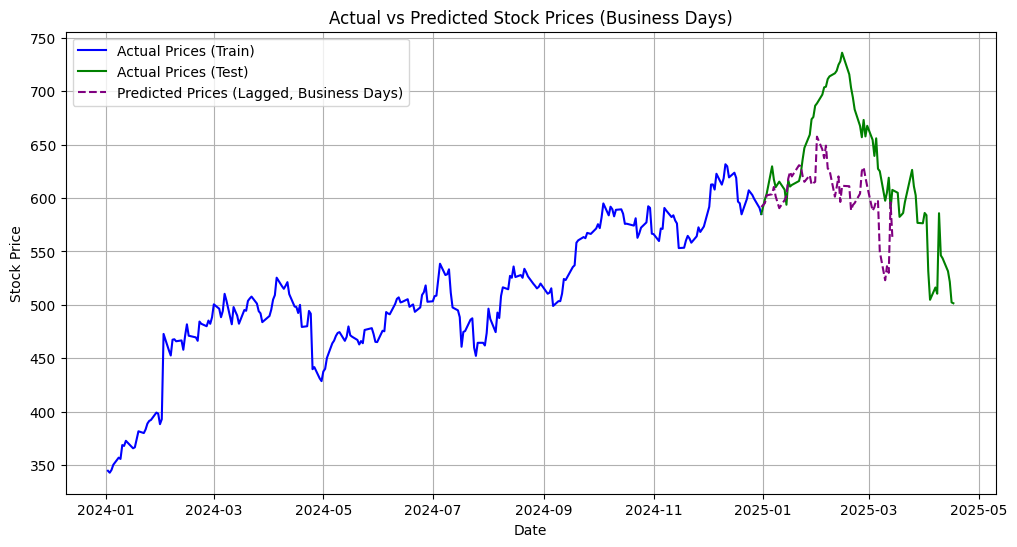

In [22]:

forecast_test_lagged = final_model.predict(future_test_lagged)

# Plot the results
plt.figure(figsize=(12, 6))
plt.grid(True)
plt.plot(df['Date'], df['Close'], label="Actual Prices (Train)", color='blue')
plt.plot(actual['Date'], actual['Close'], label="Actual Prices (Test)", color='green')
plt.plot(future_test_lagged['ds'], forecast_test_lagged['yhat'], label="Predicted Prices (Lagged, Business Days)", color='purple', linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Actual vs Predicted Stock Prices (Business Days)")
plt.legend()
plt.show()